In [7]:
import numpy as np
from numpy.linalg import svd
import pandas as pd
from sklearn.preprocessing import StandardScaler


def loadMatrix(name):
    A = np.loadtxt(name)
    A = A.T
    print(A.shape)
    return A

def computePCA(A, center= True):
    print('------------------------------------------')
    print('Computing PCA over the covariance matrix:')
    print('------------------------------------------')
    
    n = A.shape[1]  ## number of observations: 16
    m = A.shape[0]  ## variables : 4
    r = np.linalg.matrix_rank(A)
    
    print('Number of features: m= ', m) 
    print('Number of samples: n=', n)
    
    
    Y = 1/np.sqrt(n)* A.T
    
    print(np.linalg.norm(np.cov(A) - np.matmul(Y.T, Y)))
    ## The matrix we are working with is not actually the covariance matrix!! 
    ## Since clearly the dataset used as input is not centered!
    ## We should work with the centered data to get an accurate expression of the PCA
    if center:
        df = pd.DataFrame(A)
        #center the values in each column of the DataFrame
        A_cent = df.apply(lambda x: x-x.mean())

         
        #for i in range(m):
        #    A_cent[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) )
        A_cent = A_cent.to_numpy()
        Y = 1/np.sqrt(n)* A_cent.T

        print(np.linalg.norm(np.cov(A) - np.matmul(Y.T, Y)))
        #print(np.linalg.norm(np.cov(A_cent) - np.matmul(Y.T, Y)))
    
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    #print(U.shape, s.shape, V.shape)
    eigvals = s**2
    print(s, eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    s_prueba = np.zeros(s.shape)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
        s_prueba[i] = s[i]/np.sum(s)
    
    PCA = np.matmul(V, A)
    print('Variance ratio with s:', s_prueba)
    
    
    for i in range(len(propV)):
        print('--------------')
        print('The principal component with variance proportion {:.4f}'.format(propV[i])+' is given by the direction:', V.T[:, i])
        print('Its corresponding standard deviation is:', np.std(V.T[:,i]))
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    print(PCA.T)
    
    
    return PCA, propV

def computePCA_corr(A):
    print('------------------------------------------')
    print('Computing PCA over the correlation matrix:')
    print('------------------------------------------')
    
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    print('Number of features: m= ', m) 
    print('Number of samples: n=', n)
    
    
    scaler = StandardScaler()
  
    # transform data
    df = pd.DataFrame(A)
    A_stand = scaler.fit_transform(df)
    #A_stand = df.to_numpy()
    
    '''
    A_stand = np.zeros(A.shape)
    ## Compute the correlation matrix:
    for i in range(m):
        A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])

    #print(A_stand)
    
    ## now we compute the covariance matrix of the standarized matrix:
    '''
    
    Y = 1/np.sqrt(n-1)* A_stand.T
    
    ## checking that the matrix corresponds to the correlation matrix:
    #print(np.corrcoef(A))
    #print(np.matmul(Y.T, Y))
    print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    
    U,s,V = svd(Y,full_matrices=False)
    
    ## V given is the transpose of V
    
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    eigvals = s**2
    print(s, eigvals)
    s_prueba = np.zeros(s.shape)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
        s_prueba[i] = s[i]/np.sum(s)
    
    PCA = np.matmul(V, A)
    print('Variance ratio with s:', s_prueba)
    
    for i in range(len(propV)):
        print('--------------')
        print('The principal component with variance proportion {:.3f}'.format(propV[i])+' is given by the direction:', V.T[:, i]) 
        print('Its corresponding standard deviation is:', np.std(V.T[:,i]))
        
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    
    print(PCA.T)
        
    return PCA, propV, A_stand

A = loadMatrix('./proj2/example.dat')
PCA, propV = computePCA(A)
PCA_corr, propV_corr, A_stand = computePCA_corr(A)


(4, 16)
------------------------------------------
Computing PCA over the covariance matrix:
------------------------------------------
Number of features: m=  4
Number of samples: n= 16
85.23008300248868
3.2821240568651238
[2.91236009e+00 1.47046145e+00 7.04646601e-01 2.22707689e-16] [8.48184129e+00 2.16225688e+00 4.96526832e-01 4.95987146e-32]
Variance ratio with s: [5.72457657e-01 2.89036002e-01 1.38506342e-01 4.37757412e-17]
--------------
The principal component with variance proportion 0.7613 is given by the direction: [-0.7222779  -0.2069642   0.50783574  0.42140636]
Its corresponding standard deviation is: 0.4999999999999998
--------------
The principal component with variance proportion 0.1941 is given by the direction: [ 0.47747179 -0.83890585  0.21906007  0.14237399]
Its corresponding standard deviation is: 0.49999999999999983
--------------
The principal component with variance proportion 0.0446 is given by the direction: [-0.01831206 -0.05833347 -0.66641995  0.74306549]
It

In [16]:
from sklearn.decomposition import PCA
import pandas as pd
A = np.loadtxt('./proj2/example.dat')
print(A.shape)
    #A = A.T
df = pd.DataFrame(A.T)
#center the values in each column of the DataFrame
A_cent = df.apply(lambda x: (x-x.mean()/x.std()))
A_cent = A_cent.to_numpy()

df = pd.DataFrame(A_cent.T)
features = df.columns
print(df.shape)
#print(df)
pca = PCA()
components = pca.fit_transform(df[features])
print(components)

print('Variances ratio:', pca.explained_variance_ratio_)
print('Variances:', pca.explained_variance_)

print(pca.components_)
print('Singular values:', pca.singular_values_)
print('Number of features: m= ', pca.n_features_) 
print('Number of samples: n=', pca.n_samples_)

(16, 4)
(16, 4)
[[-2.60107685 -0.24202739  0.40679181 -0.44013842]
 [-3.41419162  1.53712902  2.67341119  0.63687519]
 [-2.51422196 -3.1799394   0.65942122 -0.67462714]
 [-2.47405073  3.60322657 -1.07522052 -0.94566694]
 [-2.46985    -0.53984725 -0.42400086  0.17715608]
 [-2.87221386  0.79637274  1.26486042 -0.27298962]
 [-2.84254166  3.54543425 -1.4019771   1.18030671]
 [-3.07267017 -2.65432143 -0.2918239   0.03740802]
 [ 2.87385701  0.08523108  0.34220535 -0.68729404]
 [ 4.46083479 -0.30546924  0.73375185  1.36886946]
 [ 3.92348384  1.56195913 -0.50247233 -0.67820475]
 [-0.62010712 -3.36778771 -1.81558539  0.4519514 ]
 [ 2.55901055 -0.63284689  0.08130918 -0.75269384]
 [ 1.18129398 -1.65568495 -0.77390595  0.58813812]
 [ 2.94797578  1.13637857 -1.7993123  -0.05280113]
 [ 4.93446801  0.31219288  1.92254733  0.0637109 ]]
Variances ratio: [0.60518895 0.26424293 0.10032468 0.03024343]
Variances: [9.8437031  4.29804432 1.63183145 0.49192469]
[[-0.4913684   0.02163814  0.64929863  0.580086

In [16]:
from sklearn.decomposition import PCA
A = loadMatrix('./proj2/example.dat')


A_stand = np.zeros(A.shape)
## Compute the correlation matrix:
for i in range(A.shape[0]):
    A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])
df = pd.DataFrame(A_stand.T)
features = df.columns
print(df.shape)
#print(df)
pca = PCA()
components = pca.fit_transform(df[features])
print(components)

print('Variantes ratio:', pca.explained_variance_ratio_)

print(pca.components_)
print('Singular values:', pca.singular_values_)
print('Number of features: m= ', pca.n_features_) 
print('Number of samples: n=', pca.n_samples_)

(4, 16)
(16, 4)
[[ 1.14520929  0.20585347 -0.35127392 -0.22821265]
 [ 2.13579331  1.82692136 -0.28494506  0.19505665]
 [ 0.3753926   0.72038791 -0.832809   -0.25015836]
 [ 2.09369303 -0.91650704  0.7763731  -0.61540022]
 [ 0.69056863 -1.39486696 -1.14474846  0.19864877]
 [ 1.66810444  1.0528595  -0.03682508 -0.22610387]
 [ 2.46227084 -0.7911549   1.11523239  0.54624598]
 [ 0.83716461  0.13681365 -0.50364879  0.15098459]
 [-1.55237366 -0.28114087 -0.31466795 -0.38385788]
 [-1.93639418  1.21356043  0.677493    0.6782424 ]
 [-1.68175129 -0.95800676  0.17906912 -0.41379391]
 [-0.76950876 -1.62233387 -0.8747274   0.48610976]
 [-1.28231691  0.5697695   0.40997484 -0.4216036 ]
 [-0.87575117 -0.08674892  0.17656622  0.39859108]
 [-0.94992252 -0.69067064  1.23287211 -0.05039669]
 [-2.36017827  1.01526413 -0.22393512 -0.06435206]]
Variantes ratio: [0.60757275 0.24030055 0.11616759 0.03595911]
[[ 0.5229138   0.17713905 -0.59652595 -0.58252871]
 [-0.00807487 -0.97675554 -0.13369503 -0.16735905]
 [

In [17]:
corr = np.corrcoef(A)
pc = np.linalg.eig(corr)
print(pc)

(array([2.43029099, 0.46467035, 0.14383645, 0.96120221]), array([[ 0.5229138 ,  0.84835246, -0.08242604,  0.00807487],
       [ 0.17713905, -0.119866  , -0.01423081,  0.97675554],
       [-0.59652595,  0.29507268, -0.73431229,  0.13369503],
       [-0.58252871,  0.42292122,  0.67363855,  0.16735905]]))


In [15]:
PCA_corr, propV_corr, A_stand = computePCA_corr(A)

------------------------------------------
Computing PCA over the correlation matrix:
------------------------------------------
Number of features: m=  4
Number of samples: n= 16
4.554367738890935e-16
(16, 4) (4,) (4, 4)
[1.55893906 0.9804092  0.68166733 0.37925777] [2.43029099 0.96120221 0.46467035 0.14383645]
Variance ratio with s: [0.43300575 0.27231521 0.18933766 0.10534138]
--------------
The principal component with variance proprotion 0.608 is given by the direction: [-0.5229138   0.00807487 -0.84835246  0.08242604]
Its corresponding standard deviation is: 0.3840280019578535
--------------
The principal component with variance proprotion 0.240 is given by the direction: [-0.17713905  0.97675554  0.119866    0.01423081]
Its corresponding standard deviation is: 0.44216650331402
--------------
The principal component with variance proprotion 0.116 is given by the direction: [ 0.59652595  0.13369503 -0.29507268  0.73431229]
Its corresponding standard deviation is: 0.405613879606690

In [20]:
print(A.shape, PCA.shape)

(4, 16) (4, 16)


In [21]:
cov = np.cov(A)
pc = np.linalg.eig(cov)
print(pc)

(array([9.3240832 , 2.21170517, 1.87267453, 0.51237043]), array([[ 0.59576605,  0.37861843,  0.70646715, -0.05113761],
       [ 0.10854723,  0.83426284, -0.54016782, -0.02101742],
       [-0.60530077,  0.26751107,  0.31793906, -0.67894297],
       [-0.51661522,  0.29848187,  0.32869079,  0.73210631]]))


In [26]:
PCA, propV = computePCA(A)

------------------------------------------
Computing PCA over the covariance matrix:
------------------------------------------
Number of features: m=  4
Number of samples: n= 16
[9.67717926 2.98740437 1.38390184 0.7158438 ] [93.64779846  8.92458488  1.91518432  0.51243235]
Variance ratio with s: [0.6554432  0.20233932 0.09373279 0.04848468]
--------------
The principal component with variance proprotion 0.892 is given by the direction: [-0.4390472   0.72389617  0.52933835  0.05488905]
Its corresponding standard deviation is: 0.45032670583262113
--------------
The principal component with variance proprotion 0.085 is given by the direction: [-0.544242    0.25276353 -0.79957979  0.02415363]
Its corresponding standard deviation is: 0.4229150698060809
--------------
The principal component with variance proprotion 0.018 is given by the direction: [-0.49623305 -0.49926238  0.20052205  0.6813815 ]
Its corresponding standard deviation is: 0.499192904026909
--------------
The principal compon

# Q2

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd


def loadData(name):
    B = pd.read_csv(name)
    B = B.fillna(0)
    B1 = B.to_numpy()
    B2 = B1[:, 1:]
    B3 = np.array(B2,dtype='float64')

    array_sample = B.columns[1:]
    
    return B3, array_sample

'''
for i in range(PCA.shape[0]):
    print(array_sample[i], PCA[:, i], lamb[i])
'''

def computePCA_(A, corr = False):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    print('Number of features: m= ', m) 
    print('Number of samples: n=', n)
    
    if corr:
        print('------------------------------------------')
        print('Computing PCA over the correlation matrix:')
        print('------------------------------------------')
    
        A_stand = np.zeros(A.shape)
        ## Compute the correlation matrix:
        for i in range(m):
            A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])

        #print(A_stand)

        ## now we compute the covariance matrix of the standarized matrix:
        Y = 1/np.sqrt(n)* A_stand.T

        ## checking that the matrix corresponds to the correlation matrix:
        #print(np.corrcoef(A))
        #print(np.matmul(Y.T, Y))
        print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    else: 
        print('------------------------------------------')
        print('Computing PCA over the covariance matrix:')
        print('------------------------------------------')
        '''
            A_stand = np.zeros(A.shape)
        ## Compute the correlation matrix:
        for i in range(m):
            A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) 

        Y = 1/np.sqrt(n-1)* A_stand.T
        print(np.linalg.norm(np.cov(A) - np.matmul(Y.T, Y)))
        '''
        Y = 1/np.sqrt(n-1)* A.T
    
    U,s,V = svd(Y,full_matrices=False)
    print(U.shape, s.shape, V.shape)
    
    ## here V = V^t, is the output of the svd function
    
    eigvals = s**2
    print('Singular values:', s)
    print('Eigenvalues of the covariance matrix: (variances)', eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
        
    s_prueba = np.zeros(s.shape)
    for i in range(s.shape[0]):
        s_prueba[i] = s[i]/np.sum(s)
    print('Variance ratio with s:', s_prueba)
        
    print(V.shape, A.shape)
    
    if corr:
        PCA = np.matmul(V, A_stand)
    else:
        PCA = np.matmul(V, A)
    print(PCA.shape)
    
    #PCA = np.matmul(V, A)
    #print(PCA.shape)
    
    ## Each column of V.T = V, or each row of V=V^t
    for i in range(len(propV)):
        print('--------------')
        print('The principal component with variance proportion {:.5f}'.format(propV[i])+' is given by the direction:', V[:, i])  
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    print(PCA.T)
    #for i in range(PCA.shape[]):
    #    print(PCA[:, i])
        
    return PCA, propV, V

B, samples =loadData('./proj2/RCsGoff.csv')
VV, lamb, PCA = computePCA_(B)
#VV2, lamb2, PCA2 = computePCA_corr(B, corr = True)


Number of features: m=  58581
Number of samples: n= 20
------------------------------------------
Computing PCA over the covariance matrix:
------------------------------------------
(20, 20) (20,) (20, 58581)
Singular values: [1576758.30911458  256439.47069229  174674.85267134  104981.98404751
   68375.79122416   47482.95374553   38531.35479693   26763.08780161
   20069.44525563   11135.36600337    6969.05325219    6459.14669559
    6344.92122428    5685.94041192    5156.29947623    4299.08141154
    4031.50818335    3649.31245731    3323.04725266    3071.04786759]
Eigenvalues of the covariance matrix: (variances) [2.48616677e+12 6.57612021e+10 3.05113042e+10 1.10212170e+10
 4.67524883e+09 2.25463090e+09 1.48466530e+09 7.16262869e+08
 4.02782633e+08 1.23996376e+08 4.85677032e+07 4.17205760e+07
 4.02580253e+07 3.23299184e+07 2.65874243e+07 1.84821010e+07
 1.62530582e+07 1.33174814e+07 1.10426430e+07 9.43133501e+06]
Variance ratio with s: [0.66412139 0.10801081 0.07357203 0.0442178  0.0

In [35]:
PCA.shape

(20, 58581)

In [36]:
## PCA is V the matrix which has as columns the principal components as a function of the old variables
## It has as columns as measurements?
## We should have a principal component per observation

In [37]:
PCA[0]
## PCA 1 expressed in terms of the m initial variables

array([-2.45862177e-07, -1.60577243e-03, -1.51485901e-05, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [38]:
PCA[:,0]
## the projection over the first initial variable of all 20 PCA components

array([-2.45862177e-07,  3.88866994e-07, -4.38785773e-07,  3.18075870e-07,
       -2.94373351e-06, -3.28872149e-06, -9.22742028e-09, -9.53945405e-07,
       -2.65379115e-06,  1.66817083e-05, -3.31013881e-05, -1.25386676e-05,
        5.05844206e-05, -4.96372129e-05,  1.60677548e-05,  4.78930940e-06,
        3.70635614e-06,  4.86005020e-06, -5.90326520e-06,  2.42605315e-05])

In [39]:
PCA[:,1]
## the projection over the first initial variable of all 20 PCA components

array([-0.00160577, -0.00032549,  0.00036401, -0.00086042, -0.001554  ,
       -0.00168676,  0.00027322,  0.00131257, -0.00243399, -0.002551  ,
       -0.001697  ,  0.00866447,  0.00102963, -0.00256851,  0.00027358,
       -0.00251155, -0.00613151,  0.00603767,  0.00243132, -0.00240149])

In [42]:
VV, lamb, PCA = computePCA_(B.T)
#

Number of features: m=  20
Number of samples: n= 58581
------------------------------------------
Computing PCA over the covariance matrix:
------------------------------------------
(58581, 20) (20,) (20, 20)
Singular values: [28396.65892314  4618.35155178  3145.8100998   1890.67504946
  1231.41511972   855.14516358   693.93117112   481.9903416
   361.44105815   200.542587     125.50929783   116.32612594
   114.26898013   102.40105259    92.86247403    77.4243889
    72.60552373    65.72236249    59.84648305    55.3080953 ]
Eigenvalues of the covariance matrix: (variances) [8.06370238e+08 2.13291711e+07 9.89612118e+06 3.57465214e+06
 1.51638320e+06 7.31273251e+05 4.81540470e+05 2.32314689e+05
 1.30639639e+05 4.02173292e+04 1.57525838e+04 1.35317676e+04
 1.30573998e+04 1.04859756e+04 8.62343908e+03 5.99453600e+03
 5.27156208e+03 4.31942893e+03 3.58160153e+03 3.05898541e+03]
Variance ratio with s: [0.66412139 0.10801081 0.07357203 0.0442178  0.02879948 0.01999954
 0.01622918 0.01127246 

In [5]:
import pandas as pd
import numpy as np
from numpy.linalg import svd

def loadData(name):
    B = pd.read_csv(name)
    B = B.fillna(0)
    
    #print(df_centered.shape)
    B1 = B.to_numpy()
    B2 = B1[:, 1:]
    
    df = pd.DataFrame(B2.T)
    print(df.shape)
    
    print(df.mean())
    print('Centering the data...')
    #center the values in each column of the DataFrame
    df_centered = df.apply(lambda x: x-x.mean())
    
    #view centered DataFrame
    #print(df_centered)
    print(df_centered.mean())
    df_centered = df_centered.T
    
    B3 = np.array( df_centered.to_numpy() ,dtype='float64')
    print(B3.shape)

    array_sample = B.columns[1:]
    
    return B3, array_sample

def computePCA_corr(A, corr = False):
    n = A.shape[1]
    m = A.shape[0]
    r = np.linalg.matrix_rank(A)
    
    print('Number of features: m= ', m) 
    print('Number of samples: n=', n)
    
    if corr:
        print('------------------------------------------')
        print('Computing PCA over the correlation matrix:')
        print('------------------------------------------')
        df= pd.DataFrame(A.T)
        df_stand= df.apply(lambda x: x/x.std())
        df_stand = df_stand.T
        A_stand = np.array(df_stand.to_numpy(), dtype='float64')
        ## Compute the correlation matrix:
        #for i in range(m):
        #    A_stand[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) ) /np.std(A[i,:])

        #print(A_stand)
        ## In order to center the data I may use a more computationally affordable method:
            

        ## now we compute the covariance matrix of the standarized matrix:
        Y = 1/np.sqrt(n)* A_stand.T

        ## checking that the matrix corresponds to the correlation matrix:
        #print(np.corrcoef(A))
        #print(np.matmul(Y.T, Y))
        print(np.linalg.norm(np.corrcoef(A) - np.matmul(Y.T, Y)))
    else: 
        print('------------------------------------------')
        print('Computing PCA over the covariance matrix:')
        print('------------------------------------------')
        
        #A_centr = np.zeros(A.shape)
        ## Compute the correlation matrix:
        #for i in range(m):
        #    A_centr[i, :] = (A[i,:] - np.repeat(np.mean(A[i, :]), len(A[i, :])) )
        Y = 1/np.sqrt(n-1)* A.T
    
    U,s,V = svd(Y,full_matrices=False)
    #reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    print(U.shape, s.shape, V.shape)
    
    ## here V = V^t, is the output of the svd function
    
    eigvals = s**2
    print('Singular values:', s)
    print('Eigenvalues of the covariance matrix: (variances)', eigvals)
    propV = np.zeros(s.shape)
    totalV = np.sum(eigvals)
    for i in range(s.shape[0]):
        propV[i] = eigvals[i]/totalV
    
    print(V.shape, A.shape)
    
    if corr:
        PCA = np.matmul(V, A_stand)
    else:
        PCA = np.matmul(V, A)
    print(PCA.shape)
    
    #PCA = np.matmul(V, A)
    #print(PCA.shape)
    
    ## Each column of V.T = V, or each row of V=V^t
    for i in range(len(propV)):
        print('--------------')
        print('The principal component with variance proprotion {:.3f}'.format(propV[i])+' is given by the direction:', V[:, i]) 
        print('Its corresponding standard deviation is:', np.std(V[:,i]))
    
    print('--------------')
    print('The expression of the original variables in terms of the principal components is given as follows:')

    print(PCA.T)
    #for i in range(PCA.shape[]):
    #    print(PCA[:, i])
        
    return PCA.T, propV, V


def checkVecs(A):
    corr = np.corrcoef(A)
    pc = np.linalg.eig(corr)
    print('Eigenvectors of correlation matrix:', pc)
    return pc


B, samples =loadData('./proj2/RCsGoff.csv')

## we want to center in terms of the m variables for each observation 
## (we center each row, or each col of B.T)

PCA, ratioV, V = computePCA_corr(B)

print(PCA.shape)

(20, 58581)
0           0.30
1        2314.35
2          21.70
3           1.45
4           0.00
          ...   
58576       0.00
58577       0.00
58578       0.00
58579       0.00
58580       0.00
Length: 58581, dtype: float64
Centering the data...
0        2.498002e-17
1        0.000000e+00
2       -7.105427e-16
3       -6.661338e-17
4        0.000000e+00
             ...     
58576    0.000000e+00
58577    0.000000e+00
58578    0.000000e+00
58579    0.000000e+00
58580    0.000000e+00
Length: 58581, dtype: float64
(58581, 20)
Number of features: m=  58581
Number of samples: n= 20
------------------------------------------
Computing PCA over the covariance matrix:
------------------------------------------
(20, 20) (20,) (20, 58581)
Singular values: [5.24848455e+05 2.45234975e+05 1.59640861e+05 1.04885999e+05
 6.83531047e+04 4.19240029e+04 3.71754545e+04 2.45005396e+04
 1.25276712e+04 1.09332447e+04 6.68680165e+03 6.36366986e+03
 6.24843069e+03 5.55604510e+03 4.43992189e+03 4.0800268

In [2]:
import matplotlib.pyplot as plt

PCA1 = PCA[:,0]
PCA2 = PCA[:,1]

In [6]:
ratioV

array([7.22991067e-01, 1.57844663e-01, 6.68887693e-02, 2.88735461e-02,
       1.22625722e-02, 4.61307556e-03, 3.62725141e-03, 1.57549266e-03,
       4.11913267e-04, 3.13735180e-04, 1.17355100e-04, 1.06287053e-04,
       1.02472421e-04, 8.10208153e-05, 5.17387276e-05, 4.36909142e-05,
       4.02188378e-05, 2.95266449e-05, 2.56038410e-05, 1.16166457e-29])

In [7]:
suma =0
for i in range(len(ratioV)):
    suma += ratioV[i]
    print(i, suma)

0 0.7229910666292594
1 0.8808357299228423
2 0.9477244992694659
3 0.9765980454083171
4 0.9888606175588942
5 0.9934736931224148
6 0.9971009445357832
7 0.9986764371976143
8 0.9990883504651036
9 0.999402085645156
10 0.9995194407447211
11 0.9996257277979619
12 0.999728200219245
13 0.9998092210345102
14 0.9998609597621141
15 0.9999046506762979
16 0.999944869514108
17 0.999974396159015
18 0.9999999999999998
19 0.9999999999999998


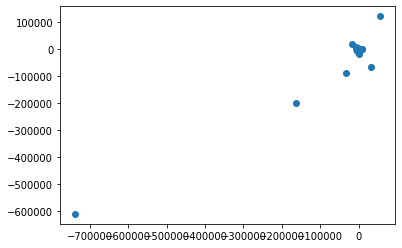

In [3]:
plt.scatter(PCA1, PCA2)

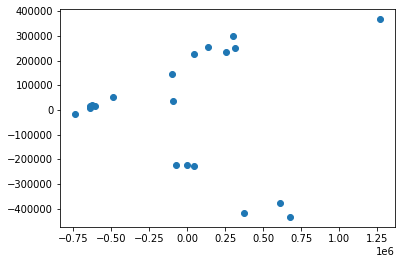

In [4]:
plt.scatter(PCA[0,:], PCA[1,:])

In [15]:
V.shape

(20, 58581)

In [5]:
f = open("outputPCA.txt", "a")

In [11]:
f = open("outputPCA.txt", "w")
for i in range(PCA.shape[0]):
    print(samples[i], PCA[i, :], ratioV[i])
    f.write(str(samples[i]))
    f.write(',')
    f.write(str(PCA[i, :]))
    f.write(',')
    f.write(str(ratioV[i]))
    f.write('\n')
f.close()
#f.write("Now the file has more content!")

day0_rep1 [-737166.47050459 -610808.20302294 -488599.64577495   43482.63968993
   -3686.27361639  -73671.40287972 -641167.49024032 -639134.52305039
 -624943.58348108  315658.09934518  251760.22346233  -99062.63100856
 1266483.37926721  -93589.02567995  371491.21234286  609080.39687886
  676057.23180025  299676.05110016  133002.10681295   45137.90855917] 0.7229910666292594
day0_rep2 [ -18654.58694303   16615.78961221   52940.05465467 -227207.61277493
 -224777.22518189 -224216.6068666    15269.5514273     6240.98668655
   18917.77535786  252023.17336567  233066.71139265  145424.44310678
  367232.06097277   37080.61314829 -418859.9925371  -377237.64002078
 -433566.68703183  297353.04066111  256715.18867054  225640.96229976] 0.1578446632935829
day0_rep3 [-1.64214491e+05 -1.99713264e+05 -3.16005865e+05  4.72947364e+04
  4.99457945e+04  7.43038094e+04  1.39178341e+05  1.43593594e+05
  1.40259211e+05  2.33259388e+05  2.29425632e+05  2.22487914e+05
 -6.16223231e+04  5.40609912e+04 -4.20694621e

In [4]:
72.2991066629+5.784466329 +0.06689+0.02887 +0.01226

78.1915929919

In [18]:
B

array([[-3.00000e-01, -3.00000e-01, -3.00000e-01, ..., -3.00000e-01,
         1.70000e+00, -3.00000e-01],
       [-1.20135e+03, -1.41735e+03, -8.16350e+02, ...,  1.07865e+03,
         5.31650e+02,  2.70650e+02],
       [-1.37000e+01, -1.27000e+01, -3.70000e+00, ...,  2.30000e+00,
         7.30000e+00,  9.30000e+00],
       ...,
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])

In [ ]:
Bcorr = np.corrcoef(B)
eig = np.linalg.eig(Bcorr)
print(eig)